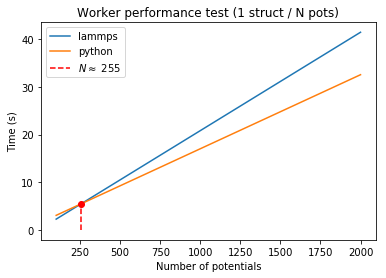

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("2000_timing_tests.dat")

x = data[:,0]
lammpsy = data[:,1]
pythony = data[:,2]

A = np.ones((len(data), 2))
A[:,1] = x.copy()

lammpsb, lammpsm = np.linalg.lstsq(A, lammpsy)[0]
pythonb, pythonm = np.linalg.lstsq(A, pythony)[0]

intersection = (pythonb - lammpsb)/(lammpsm - pythonm)

lammpsf = lambda x: lammpsb + lammpsm*x
pythonf = lambda x: pythonb + pythonm*x

xplotting = np.linspace(data[0,0], data[len(data)-1,0], num=1000)
lammpsfit = np.array(list(map(lammpsf, xplotting)))
pythonfit = np.array(list(map(pythonf, xplotting)))

diff = lammpsfit - pythonfit

plt.figure()
plt.title("Worker performance test (1 struct / N pots)")
plt.plot(xplotting, lammpsfit, '-', label='lammps')
plt.plot(xplotting, pythonfit, '-', label='python')
plt.plot((intersection, intersection), (0, lammpsf(intersection)), '--r',
         label=r'$N \approx$ {0}'.format(int(intersection)))
plt.plot(intersection, lammpsf(intersection), 'ro')
plt.xlabel("Number of potentials")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

#plt.figure()
#plt.title("Worker performance test (1 struct / N pots)")
#plt.plot(xplotting, diff)
#plt.show()

In [115]:
# Plotting gradient runtimes
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

e_speedups = defaultdict(list)
f_speedups = defaultdict(list)

with open("../../grad_time_long2.dat", 'r') as file:
    lines = file.readlines()
    
    for line in lines[1:]:
        if 'speedup' not in line:
            line = line.split(" ")

            e_speedups[line[0]].append(float(line[1]))
            f_speedups[line[0]].append(float(line[4]))

e_avg_speedups = {}
f_avg_speedups = {}

e_stdv = {}
f_stdv = {}

for key in e_speedups.keys():
    e_avg_speedups[key] = np.average(e_speedups[key])
    f_avg_speedups[key] = np.average(f_speedups[key])
    
    e_stdv[key] = np.std(e_speedups[key])
    f_stdv[key] = np.std(f_speedups[key])
    
names = np.array(list(e_avg_speedups.keys()))

e_avg_speedups = np.array(list(e_avg_speedups.values()))
f_avg_speedups = np.array(list(f_avg_speedups.values()))

e_stdv = np.array(list(e_stdv.values()))
f_stdv = np.array(list(f_stdv.values()))

# e_indices = np.argsort(e_avg_speedups)
f_indices = np.argsort(f_avg_speedups)

e_avg_speedups = e_avg_speedups[f_indices]
f_avg_speedups = f_avg_speedups[f_indices]

e_stdv = e_stdv[f_indices]
f_stdv = e_stdv[f_indices]

names = names[f_indices]

print(e_speedups['bulk_vac_ortho_mixed'])

[11.327226033960674, 14.05786365343256, 33.69642175936522, 9.263521941263182, 6.785684079952637, 12.097571205246501, 11.156494048070362, 9.729474563346526, 11.465910826080318, 11.191001373836055]


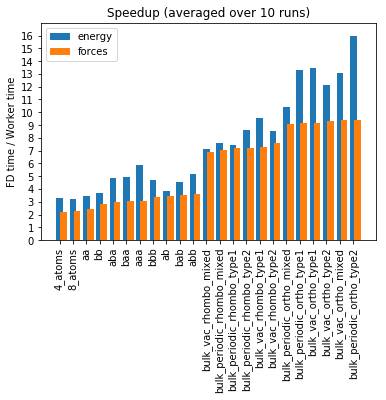

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)

xpos = np.arange(len(names))
width = 0.5

rects1 = ax.bar(xpos, e_avg_speedups, align = 'center', label='energy', width=width)#, yerr=e_stdv)
rects1 = ax.bar(xpos+0.3, f_avg_speedups, align = 'center', label='forces', width=width)#, yerr=f_stdv)

ax.set_xticklabels(names, rotation=90)
plt.xticks(np.arange(len(names)))
plt.title("Speedup (averaged over 10 runs)")
plt.ylabel("FD time / Worker time")
plt.ylim([0,17])
plt.yticks(np.arange(17))
plt.legend()
plt.savefig('grad_speedup.png')
plt.show()

In [131]:
# Plotting gradient accuracies
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

e_absolute_errors = defaultdict(list)
f_absolute_errors = defaultdict(list)

with open("../../src/grad_accuracy_normed_redo.dat", 'r') as file:
    lines = file.readlines()
    
    for line in lines[1:]:
        if 'name' not in line:
            line = line.split(" ")

            e_absolute_errors[line[0]].append(float(line[1]))
            f_absolute_errors[line[0]].append(float(line[2]))

avg_e_absolute_errors = {}
avg_f_absolute_errors = {}

for key in e_absolute_errors.keys():
    avg_e_absolute_errors[key] = np.average(e_absolute_errors[key])
    avg_f_absolute_errors[key] = np.average(f_absolute_errors[key])

names = np.array(list(e_absolute_errors.keys()))

avg_e_absolute_errors = np.array(list(avg_e_absolute_errors.values()))
avg_f_absolute_errors = np.array(list(avg_f_absolute_errors.values()))

# e_indices = np.argsort(avg_e_absolute_errors)
# f_indices = np.argsort(avg_f_absolute_errors)

# avg_e_absolute_errors = avg_e_absolute_errors[f_indices]
# avg_f_absolute_errors = avg_f_absolute_errors[f_indices]

# names = names[f_indices]

print(np.log10(avg_e_absolute_errors))
print(avg_f_absolute_errors)
print(np.log10(avg_f_absolute_errors))

[-7.48432323 -7.32275488 -7.8713026  -7.53293492 -7.8713026  -7.99523033
 -7.35200599 -7.46151473 -7.91632343 -7.53726832 -7.56604558 -7.68936495
 -7.82237018 -7.5495261  -7.35200599 -7.9118902  -7.82237018 -7.5495261
 -7.68936495 -7.48432323 -7.87644406 -7.44869722 -7.99523033]
[5.52189259e-08 3.71973722e-08 3.07495713e-06 7.28931983e-08
 3.07495713e-06 3.28499387e-06 2.81133153e-07 5.93983018e-08
 3.11577244e-08 1.16567451e-07 7.35362087e-08 8.66529237e-07
 1.03159147e-07 1.32998586e-07 2.81133153e-07 1.69240894e-08
 1.03159147e-07 1.32998586e-07 8.66529237e-07 3.72573288e-08
 5.23767144e-07 1.30553984e-08 3.28499387e-06]
[-7.25791205 -7.42948774 -5.51216093 -7.13731299 -5.51216093 -5.48346544
 -6.55108794 -7.22622597 -7.50643427 -6.9334227  -7.13349876 -6.06221678
 -6.98649226 -6.87615298 -6.55108794 -7.77149469 -6.98649226 -6.87615298
 -6.06221678 -7.42878829 -6.28086175 -7.88420987 -5.48346544]


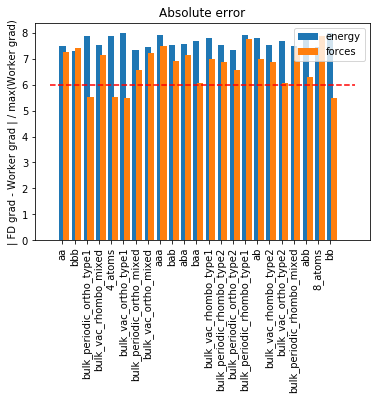

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111)

xpos = np.arange(len(names))
width = 0.5

rects1 = ax.bar(xpos, np.abs(np.log10(avg_e_absolute_errors)), align = 'center', label='energy', width=width)
rects1 = ax.bar(xpos+0.3, np.abs(np.log10(avg_f_absolute_errors)), align = 'center', label='forces', width=width)
ax.plot([-1, len(xpos)+1], [6,6], '--r')

ax.set_xticklabels(names, rotation=90)
plt.xticks(np.arange(len(names)))
plt.title("Absolute error")
plt.ylabel("| FD grad - Worker grad | / max(Worker grad)")
# plt.ylim([0,17])
# plt.yticks(np.arange(17))
plt.legend()
plt.savefig('grad_acc.png')
plt.show()

In [2]:
# Timing tests for Python vs. Numpy vs. Numba

"""
Intended to compare runtimes for various key functions:
    1) Outer products
    2) Indexing
    3) Einsum
"""

import os
import time
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [215]:
v1 = v2 = v3 = np.arange(10)

n1 = v1.shape[0]
n2 = v2.shape[0]
n3 = v3.shape[0]

tmp_output = np.zeros((n1, n2))
output = np.zeros((n1*n2, n3))

tmp_output2 = np.zeros(n1*n2)
output2 = np.zeros(n1*n2*n3)

""" Define outer product functions"""

def python_outer(u1, u2, u3, n1, n2, n3, output):

    for i in range(n1):
        u1_i = u1[i]
        for j in range(n2):
            u2_j = u2[j]
            ij = i*j
            for k in range(n3):
                output[ij*k] = u1_i*u2_j*u3[k]

    return output

def numpy_outer(u1, u2, u3, tmp_output, output):
    np.outer(u1, u2, out=tmp_output)
    np.outer(tmp_output, u3, out=output)
    
    return output

def numpy_outer_einsum(u1, u2, u3, tmp_output, output):
    np.einsum('i,j', u1, u2, out=tmp_output)
    np.einsum('i,j', tmp_output.ravel(), u3, out=output)
    
    return output.ravel()

def numpy_outer_tensordot(u1, u2, u3):
    tmp = np.tensordot(u1, u2, axes=0).ravel()
    return np.tensordot(tmp, u3, axes=0).ravel()
    
numba_py_outer = jit(python_outer, nopython=True)
numba_np_outer = jit(numpy_outer, nopython=True)
numba_np_einsum = jit(numpy_outer_einsum)
numba_np_tensordot = jit(numpy_outer_tensordot)

In [216]:
num_iters = 10000

def time_outer(fxn):
    full_time = 0
    
    for i in range(num_iters):
        v1 = v2 = v3 = np.random.random(10)

        n1 = v1.shape[0]
        n2 = v2.shape[0]
        n3 = v3.shape[0]

        start = time.time()
        fxn(v1, v2, v3, n1, n2, n3, output2)
        full_time += time.time() - start
    
    print(full_time)
    
def time_outer_2(fxn):
    full_time = 0
    
    for i in range(num_iters):
        v1 = v2 = v3 = np.random.random(10)

        n1 = v1.shape[0]
        n2 = v2.shape[0]
        n3 = v3.shape[0]

        start = time.time()
        fxn(v1, v2, v3, tmp_output, output)
        full_time += time.time() - start
    
    print(full_time)
        
def time_outer_3(fxn):
    full_time = 0
    
    for i in range(num_iters):
        v1 = v2 = v3 = np.random.random(10)

        n1 = v1.shape[0]
        n2 = v2.shape[0]
        n3 = v3.shape[0]

        start = time.time()
        fxn(v1, v2, v3)
        full_time += time.time() - start
    
    print(full_time)

In [217]:
# Native Python
print("Python\t: ", end="")
# %timeit python_outer(v1, v2, v3, n1, n2, n3, output2)
time_outer(python_outer)

# Numpy (using outer)
print("np_out\t: ", end="")
# %timeit numpy_outer(v1, v2, v3, tmp_output, output)
time_outer_2(numpy_outer)

# Numpy (using einsum)
print("np_ein\t: ", end="")
# %timeit numpy_outer_einsum(v1, v2, v3, tmp_output, output)
time_outer_2(numpy_outer_einsum)

# Numpy (using tensordot)
print("np_ten\t: ", end="")
# %timeit numpy_outer_tensordot(v1, v2, v3)
time_outer_3(numpy_outer_tensordot)

# Numba (JIT Python)
numba_py_outer(v1, v2, v3, n1, n2, n3, output2)
print("nb_pyt\t: ", end="")
# %timeit numba_py_outer(v1, v2, v3, n1, n2, n3, output2)
time_outer(numba_py_outer)

# Numba (JIT Numpy outer)
numba_np_outer(v1, v2, v3, tmp_output, output)
print("nb_out\t: ", end="")
# %timeit numba_np_outer(v1, v2, v3, tmp_output, output)
time_outer_2(numba_np_outer)

# Numba (JIT Numpy einsum)
numba_np_einsum(v1, v2, v3, tmp_output, output)
print("nb_ein\t: ", end="")
# %timeit numba_np_einsum(v1, v2, v3, tmp_output, output)
time_outer_2(numba_np_einsum)

# Numba (JIT Numpy tensordot)
numba_np_tensordot(v1, v2, v3)
print("nb_ten\t: ", end="")
# %timeit numba_np_tensordot(v1, v2, v3)
time_outer_3(numba_np_tensordot)

Python	: 3.186004400253296
np_out	: 0.1675262451171875
np_ein	: 0.1045682430267334
np_ten	: 0.676323413848877
nb_pyt	: 0.1473979949951172
nb_out	: 0.41547107696533203
nb_ein	: 0.2493274211883545
nb_ten	: 0.8121635913848877


In [222]:
N = 128
M = 10

# array, indices, and vec for indexing and einsum
A = np.random.random((N, N, M*M*M))
indices = np.arange(0, M*M*M, M // 10)
b = np.arange(M*M*M)

output = np.zeros((N, N, indices.shape[0]))

"""Define indexing functions"""

def python_indexing(A, indices, output):
    for k in range(indices.shape[0]):
        ind = indices[k]
        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                output[i,j,k] = A[i, j, ind]
                
def numpy_indexing(A, indices):
    return A[:, :, indices]

numba_py_indexing = jit(python_indexing, nopython=True)
numba_np_indexing = jit(numpy_indexing, nopython=True)

In [223]:
num_iters = 100

def time_indexing(fxn):
    full_time = 0
    
    N = 128
    M = 10
    
    for i in range(num_iters):
        A = np.random.random((N, N, M*M*M))
        indices = np.arange(0, M*M*M, M // 10)
        
        start = time.time()
        fxn(A, indices, output)
        full_time += time.time() - start
    
    print(full_time / num_iters)


In [224]:
def time_indexing_2(fxn):
    full_time = 0
    
    N = 128
    M = 10
    
    for i in range(num_iters):
        A = np.random.random((N, N, M*M*M))
        indices = np.arange(0, M*M*M, M // 10)
        
        start = time.time()
        fxn(A, indices)
        full_time += time.time() - start
    
    print(full_time / num_iters)

In [225]:
# print("Python\t: ", end="")
# %timeit python_indexing(A, indices, output)
# time_indexing(python_indexing)

print("Numpy\t: ", end="")
# %timeit numpy_indexing(A, indices)
time_indexing_2(numpy_indexing)

print("nb_pyt\t: ", end="")
# numba_py_indexing(A, indices, output)
# %timeit numba_py_indexing(A, indices, output)
time_indexing(numba_py_indexing)

print("nb_npy\t: ", end="")
# numba_np_indexing(A, indices)
# %timeit numba_np_indexing(A, indices)
time_indexing_2(numba_np_indexing)

Numpy	: 0.1770463514328003
nb_pyt	: 0.2804084634780884
nb_npy	: 0.04774094343185425


In [226]:
"""Define einsum functions"""

output2 = np.zeros((N, N))

def python_einsum(A, b, output):
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            for z in range(b.shape[0]):
                output[i,j] += b[z]*A[i,j,z]
    return output

def hybrid_einsum(A, b, output):
    for i in range(A.shape[0]):
        for a in range(A.shape[1]):
            output[i,a] = np.sum(A[i,a,:]*b)
    
def numpy_einsum(A, b, output):
    np.einsum('ijk,k->ij', A, b, out=output)
    return output
    
def numpy_einsum_noout(A, b):
    output = np.einsum('ijk,k->ij', A, b)
    return output

nb_py_einsum = jit(python_einsum, nopython=True)
nb_hybrid_einsum = jit(hybrid_einsum, nopython=True)
nb_np_einsum = jit(numpy_einsum)
nb_noout_einsum = jit(numpy_einsum_noout)

In [227]:
num_iters = 100

def time_einsum(fxn):
    full_time = 0
    
    N = 128
    M = 10
    
    for i in range(num_iters):
        A = np.random.random((N, N, M*M*M))
        b = np.arange(M*M*M)
        
        start = time.time()
        fxn(A, b, output2)
        full_time += time.time() - start
    
    print(full_time / num_iters)
    
def time_einsum_2(fxn):
    full_time = 0
    
    N = 128
    M = 10
    
    for i in range(num_iters):
        A = np.random.random((N, N, M*M*M))
        b = np.arange(M*M*M)
        
        start = time.time()
        fxn(A, b)
        full_time += time.time() - start
    
    print(full_time / num_iters)

In [228]:
# print("Python\t: ", end="")
# %timeit python_einsum(A, b, output2)

print("Hybrid\t: ", end="")
# %timeit hybrid_einsum(A, b, output2)
time_einsum(hybrid_einsum)

print("np_ein\t: ", end="")
# %timeit numpy_einsum(A, b, output2)
time_einsum(numpy_einsum)

print("no_out\t: ", end="")
# %timeit numpy_einsum_noout(A, b)
time_einsum_2(numpy_einsum_noout)

# print("nb_pyt\t: ", end="")
# nb_py_einsum(A, b, output)
# %timeit nb_py_einsum(A, b, output)

print("nb_hyb\t: ", end="")
# nb_hybrid_einsum(A, b, output)
# %timeit nb_hybrid_einsum(A, b, output)
time_einsum(nb_hybrid_einsum)

print("nb_ein\t: ", end="")
# nb_np_einsum(A, b, output2)
# %timeit nb_np_einsum(A, b, output2)
time_einsum(nb_np_einsum)

print("nb_nout\t: ", end="")
# nb_noout_einsum(A, b)
# %timeit nb_noout_einsum(A, b)
time_einsum_2(nb_noout_einsum)

Hybrid	: 0.18851606607437132
np_ein	: 0.008839917182922364
no_out	: 0.008939900398254395
nb_hyb	: 0.027758257389068605
nb_ein	: 0.009376027584075929
nb_nout	: 0.009204668998718262


In [146]:
def update_fj_gradient(gradient, up_contrib, upp_contrib, indices,
                       grad_indices, coeffs_for_fj, j, k, n_fj):

    for l in range(n_fj):
        block_up = up_contrib[:, :, indices]
        block_upp = upp_contrib[:, :, indices]

        block_up = block_up @ coeffs_for_fj
        block_upp = block_upp @ coeffs_for_fj

        gradient[:, :, grad_indices + l] += block_up
        gradient[:, :, grad_indices + l] += block_upp
        
jit_update = jit(update_fj_gradient)

In [155]:
import time

N = 10
n_fj = 25
gradient = np.zeros((N, 3, 100))

sample_indices = np.arange(0, 100, 100//n_fj)
grad_indices = np.arange(0, 50, 2)
coeffs_for_fj = np.random.random(n_fj)

In [156]:
full_time = 0

for i in range(1000):
    A = np.random.random((N, 3, 100))
    B = np.random.random((N, 3, 100))

    start = time.time()
    update_fj_gradient(gradient, A, B, sample_indices, 1, coeffs_for_fj, 0, 0, n_fj)
    full_time += time.time() - start

print(full_time)

0.6705207824707031


In [157]:
full_time = 0

for i in range(1000):
    A = np.random.random((N, 3, 100))
    B = np.random.random((N, 3, 100))

    start = time.time()
    jit_update(gradient, A, B, sample_indices, 1, coeffs_for_fj, 0, 0, n_fj)
    full_time += time.time() - start

print(full_time)

0.6442677974700928


In [1]:
"""Finding the best pot in a set of potentials"""

'Finding the best pot in a set of potentials'

In [64]:
"""Creating a GIF"""
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.interpolate import CubicSpline

import os
os.chdir("/home/jvita/scripts/s-meam/project/")
print(os.getcwd())
from src.meam import MEAM
import src.meam

TRACE_FILE_NAME = 'data/ga_results/2018-08-23-trace_test100-0.5/trace.dat'
TRUE_POT_FILE = 'data/fitting_databases/leno-redo/HHe.meam.spline'

true_pot = MEAM.from_file(TRUE_POT_FILE)
true_splines = true_pot.splines
_, true_pvec, _ = src.meam.splines_to_pvec(true_splines)

guess_pvec = np.genfromtxt(TRACE_FILE_NAME)[:11]

dat_true = np.split(true_pvec, [15, 30, 45, 58, 71, 77], axis=0)
dat_guess = np.split(guess_pvec, [15, 30, 45, 58, 71, 77], axis=1)

# currently only plots the 1st pair potential

ranges = [(-1, 4), (-1, 4), (-1, 4), (-9, 3), (-9, 3), (-0.5, 1),(-0.5, 1)]

dat_true1 = np.genfromtxt(TRUE_POT_FILE, skip_header=5, max_rows=13)
dat_true2 = np.genfromtxt(TRUE_POT_FILE, skip_header=21, max_rows=13)
dat_true3 = np.genfromtxt(TRUE_POT_FILE,skip_header=37, max_rows=13)
dat_true4 = np.genfromtxt(TRUE_POT_FILE,skip_header=53, max_rows=11)
dat_true5 = np.genfromtxt(TRUE_POT_FILE,skip_header=67, max_rows=11)
dat_true6 = np.genfromtxt(TRUE_POT_FILE,skip_header=81, max_rows=4)
dat_true7 = np.genfromtxt(TRUE_POT_FILE,skip_header=88, max_rows=4)

dat_true = [dat_true1[:,1], dat_true2[:,1], dat_true3[:,1], dat_true4[:,1],
        dat_true5[:,1], dat_true6[:,1], dat_true7[:,1]]

true_derivs = [(-20, 0), (-20, 0), (-20, 0), (-1, 0), (-1, 0),
        (0.007769, 0.10519), (0.007769, 0.10519)]

x_rngs = [np.linspace(1.74, 5.5, 13), np.linspace(1.74, 5.5, 13),
        np.linspace(1.74, 5.5, 13), np.linspace(2.05, 4.4, 11),
        np.linspace(2.05, 4.4, 11), np.linspace(-55, -24, 4),
        np.linspace(-55, -24, 4)]

x_plts = [np.linspace(1.74, 5.5, 100), np.linspace(1.74, 5.5, 100),
        np.linspace(1.74, 5.5, 100), np.linspace(2.05, 4.4, 100),
        np.linspace(2.05, 4.4, 100), np.linspace(-55, -24, 100),
        np.linspace(-55, -24, 100)]

labels = ['A-A', 'A-B', 'B-B']
titles= [r"$\phi_A$", r"$\phi_{AB}$", r"$\phi_B$",
         r"$\rho_A$", r"$\rho_B$",
         r"$U_A$", r"$U_B$"]

fig, axarr = plt.subplots(7)

true_lines = []
lines = []
dot_lines = []

for j in range(7):
    y_true, dy_true = dat_true[j][:-2], dat_true[j][-2:]
    y_guess, dy_guess = dat_guess[j][0, :-2], dat_guess[j][0, -2:]

    xlin = np.linspace(0, len(y_true), 100)

    sp_true = CubicSpline(np.arange(len(y_true)), y_true)
    sp_guess = CubicSpline(np.arange(len(y_guess)), y_guess)

    axarr[j].set_xlabel(titles[j])

    true_line, = axarr[j].plot(xlin, sp_true(xlin))
    line, = axarr[j].plot(xlin, sp_guess(xlin))
    line2, = axarr[j].plot(np.arange(len(y_guess)), y_guess, 'bo')
    
    true_lines.append(true_line)
    lines.append(line)
    dot_lines.append(line2)

def animate(i):
    for j in range(7):        
        
        y_true, dy_true = dat_true[j][:-2], dat_true[j][-2:]
        y_guess, dy_guess = dat_guess[j][i, :-2], dat_guess[j][i, -2:]

        sp_true = CubicSpline(np.arange(len(y_true)), y_true)
        sp_guess = CubicSpline(np.arange(len(y_guess)), y_guess)

        lines[j].set_ydata(sp_guess(xlin))
        dot_lines[j].set_ydata(y_guess)
        true_lines[j].set_ydata(sp_true(xlin))

        return line, ax

ani = animation.FuncAnimation(fig, animate, np.arange(1, dat_guess[0].shape[0]),
        interval=700)
ani.save('trace_of_best.gif', writer='imagemagick')

/home/jvita/scripts/s-meam/project


/home/jvita/Programs/miniconda2/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [12]:
import sys
sys.path.append("/home/jvita/scripts/s-meam/project/")

from src.meam import MEAM
import src.meam

true_pot = MEAM.from_file("/home/jvita/scripts/s-meam/project/data/fitting_databases/leno-redo/HHe.meam.spline")
_, true_pvec, _ = src.meam.splines_to_pvec(true_pot.splines)

In [21]:
import numpy as np

guess_pvec = np.genfromtxt("/home/jvita/scripts/s-meam/project/pop.dat10")[0]
guess_pvec[83:] = 0
true_pvec[83:] = 0

In [22]:
"""Confirm that potential is correct for all structures in database"""

import pickle
import glob
import os

DB_PATH = "/home/jvita/scripts/s-meam/project/data/fitting_databases/leno-redo/structures/*"

for name in glob.glob(DB_PATH):
    short_name = os.path.splitext(os.path.split(name)[-1])[0]
    
    worker = pickle.load(open(name, 'rb'))
    
    true_forces = worker.compute_forces(true_pvec)
    true_energy = worker.compute_energy(true_pvec)
    
    guess_forces = worker.compute_forces(guess_pvec)
    guess_energy = worker.compute_energy(guess_pvec)
    
    fcs_err = np.abs(np.linalg.norm(true_forces - guess_forces, axis=(1,2)) / np.sqrt(10))
    eng_err = np.abs(true_energy - guess_energy)
    
    if (fcs_err > 1) or (eng_err > 1):
        print(short_name, fcs_err, eng_err)

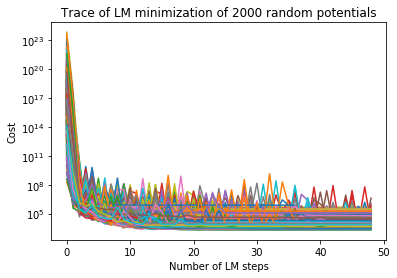

In [4]:
"""Plot traces from cluster_analysis.py script"""

import numpy as np
import matplotlib.pyplot as plt
import glob

PATH = "/home/jvita/scripts/s-meam/project/data/cluster_analysis/rank*_trace.dat"

num_plotted = 0
final_fitnesses = []

plt.figure()
for file in glob.glob(PATH):
    data = np.genfromtxt(file)
    data = np.split(data, np.where(np.diff(data[:,0]))[0] + 1)
    
    for i, subdata in enumerate(data):
        if (subdata[0, 1] < 200): print(file, subdata[0,1], i)
        plt.semilogy(subdata[3:, 1])
        num_plotted += 1
        
        final_fitnesses.append(subdata[-1, 1])

plt.xlabel("Number of LM steps")
plt.ylabel("Cost")
plt.title("Trace of LM minimization of {} random potentials".format(num_plotted))
plt.show()

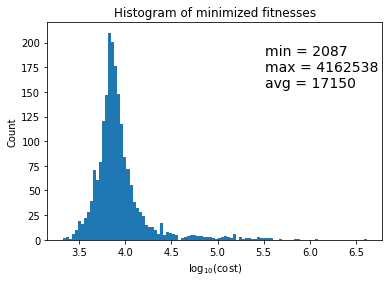

In [5]:
min_val = np.min(final_fitnesses)
max_val = np.max(final_fitnesses)
mean = np.average(final_fitnesses)

text_str = "\n".join(["min = %d" % int(min_val), "max = %d" % int(max_val), "avg = %d" % int(mean)])

fig, ax = plt.subplots()
plt.title("Histogram of minimized fitnesses")
plt.hist(np.log10(final_fitnesses), bins=100)
plt.ylabel("Count")
plt.xlabel(r"log$_{10}$(cost)")
ax.text(0.65, 0.9, text_str, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.show()